1. Data cleaning & getting rid of irrelevant information before clustering
2. Finding the optimal value of k
3. Storing cluster to which the house belongs along with the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")

In [3]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
df.shape # checking data shape

(645, 8)

In [7]:
df.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [6]:
df.isnull().sum() # There is no null values in this data.

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [14]:
df.dtypes  # checking data types, all columns have number format, no need to change data type format

Unnamed: 0       int64
Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [15]:
df.drop('Unnamed: 0', axis=1, inplace=True) # dropped Unnamed column

In [16]:
df[df.duplicated()] # checking duplicated values.

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
21,2768.124,6,19,3,2,2,100000
26,3664.740,19,19,3,2,3,200000
32,2134.800,10,19,3,2,2,55000
48,3735.900,19,19,3,2,3,200000
99,2063.640,5,7,4,2,2,70000
...,...,...,...,...,...,...,...
610,2134.800,3,6,4,2,3,98000
614,711.600,8,14,1,1,1,36000
630,1167.024,2,12,3,2,2,38000
638,1707.840,9,15,3,2,2,80000


In [17]:
df.duplicated().sum() # checking number of duplicated values.

66

In [18]:
df.drop_duplicates(inplace=True)  # to drop duplicate values.

In [19]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [20]:
df['Bedroom'].unique() # checking unique values in 'Bedroom' column

array([2, 4, 3, 1, 5, 6, 7], dtype=int64)

In [21]:
df['Bedroom'].unique().sum() # number of unique values in 'Bedroom' column

28

In [26]:
len(df['Price'].unique()) # to check how many numbers of unique values in Price.

153

In [27]:
df.sort_values(by=['Floor'], inplace=True) # Here i sorted values by floor

In [28]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
455,1391.178,1,7,1,3,3,50000
347,1622.448,1,6,3,2,2,130000
570,1181.256,1,4,3,2,2,52000
550,1565.520,1,5,3,2,3,80000
361,1739.862,1,25,3,1,1,65000


In [24]:
df.shape  # checking shape of the data

(579, 7)

In [25]:
df.size #checking size of the data

4053

`Clusturing : clustering is nothing but grouping.`

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [31]:
mm = MinMaxScaler()

In [33]:
data_trans = mm.fit_transform(df)

In [34]:
kmeans = KMeans(n_clusters=3)

In [36]:
kmeans.fit(data_trans)

KMeans(n_clusters=3)

In [41]:
kmeans.cluster_centers_

array([[0.19302962, 0.12087912, 0.19417879, 0.29230769, 0.49807692,
        0.40615385, 0.17539906],
       [0.07249191, 0.45714286, 0.34671815, 0.09047619, 0.22857143,
        0.2       , 0.12988895],
       [0.44587855, 0.53781513, 0.39745628, 0.40196078, 0.51470588,
        0.48235294, 0.57901165],
       [0.26830968, 0.72893773, 0.53638254, 0.33333333, 0.5       ,
        0.43076923, 0.27476582],
       [0.15557353, 0.44047619, 0.32207207, 0.26851852, 0.5       ,
        0.36111111, 0.1570425 ],
       [0.27086223, 0.34268707, 0.34990347, 0.44940476, 0.48660714,
        0.40714286, 0.27954841],
       [0.3247867 , 0.13961039, 0.43304668, 0.36742424, 0.48295455,
        0.4       , 0.34267705],
       [0.59907536, 0.15306122, 0.2992278 , 0.42857143, 0.51785714,
        0.52857143, 0.66958795],
       [0.36150408, 0.138322  , 0.16216216, 0.46825397, 0.52380952,
        0.64761905, 0.36449325],
       [0.10963566, 0.0952381 , 0.1168265 , 0.27956989, 0.45967742,
        0.20645161, 0.1

In [37]:
df[kmeans.labels_ == 2]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
455,1391.178,1,7,1,3,3,50000
347,1622.448,1,6,3,2,2,130000
570,1181.256,1,4,3,2,2,52000
550,1565.520,1,5,3,2,3,80000
361,1739.862,1,25,3,1,1,65000
...,...,...,...,...,...,...,...
4,967.776,11,14,3,2,2,45000
354,1031.820,11,14,3,2,2,61000
629,1316.460,12,12,3,2,2,45000
260,914.406,12,12,3,2,2,36000


In [38]:
df[kmeans.labels_ == 1]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
333,3558.000,1,7,3,2,2,160000
54,4643.190,1,6,5,4,4,180000
297,3148.830,2,25,4,2,2,98000
296,3145.272,2,25,4,2,2,98000
163,4091.700,2,15,3,2,4,180000
...,...,...,...,...,...,...,...
140,3323.172,19,21,5,3,4,140000
27,3059.880,21,24,4,2,3,145000
40,3063.438,21,24,5,2,4,145000
243,1899.972,21,27,4,2,2,57000


D:\Data Science\edyodha packages\Anaconda Packages\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


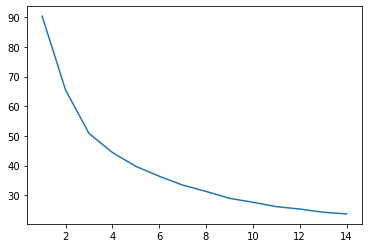

In [40]:
cs = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init="k-means++", max_iter=300)
    kmeans.fit(data_trans)
    cs.append(kmeans.inertia_)
plt.plot(range(1,15),cs)
plt.show()